In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import norm
from scipy import stats
import seaborn as sns

In [78]:
df = pd.read_csv('PREZZI.csv', sep=',').transpose()

In [79]:
df

,0,1,2,3,4,5,6,7,8,9,...,733,734,735,736,737,738,739,740,741,742
A2A,1.3045,1.331,1.3175,1.340,1.3400,1.3375,1.3315,1.305,1.335,1.3280,...,1.730,1.7535,1.7465,1.7575,1.771,1.797,1.7925,1.7915,1.7895,1.7865
ABITARE IN,4.8100,4.830,4.7100,4.860,4.8600,4.8300,4.8600,4.900,4.920,4.9100,...,5.180,5.1800,5.1400,5.0400,5.000,5.060,5.0800,5.1800,5.0600,5.0000
ACEA,17.1500,17.180,17.0100,17.310,17.0700,17.2200,17.2500,17.240,17.360,17.3900,...,11.100,11.0000,11.0000,11.2700,11.370,11.590,11.6700,11.8500,11.6100,11.4500
AEFFE,1.1040,1.086,1.0700,1.118,1.1520,1.1640,1.1220,1.102,1.110,1.1120,...,0.734,0.7310,0.7330,0.7440,0.745,0.742,0.8000,0.8050,0.8140,0.8190
AEROP GUGL MARCO,8.4800,8.360,8.5200,8.520,8.4600,8.3400,8.5000,8.500,8.240,8.3800,...,8.060,8.0200,8.1000,8.1200,8.100,8.140,8.1200,8.1200,8.0800,8.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALSOIA,13.1500,13.250,13.1500,13.350,13.3000,13.1000,13.2000,13.350,13.400,13.3000,...,8.520,8.4000,8.3800,8.3000,8.400,8.400,8.4200,8.4800,8.3800,8.5400
WEBUILD,1.1820,1.156,1.1770,1.217,1.2770,1.2660,1.2380,1.261,1.258,1.2640,...,1.611,1.6150,1.6310,1.6630,1.702,1.716,1.7800,1.8070,1.7210,1.7190
WIIT,16.3000,16.800,16.6000,16.350,16.1500,16.0000,15.9500,15.850,15.400,15.6000,...,14.520,14.4800,14.5200,14.4800,14.780,15.280,15.3800,16.0600,15.7800,16.0000
ZIGNAGO VETRO,13.6800,13.780,13.8600,13.660,13.5600,13.3400,13.4600,13.680,13.500,13.7800,...,12.220,12.2400,12.2600,12.4200,12.360,12.360,12.4000,12.6600,12.7000,13.4000


In [80]:
#Create a column Daily_price that contains the list of prices for each stock

df["Daily_price"] = df.values.tolist()

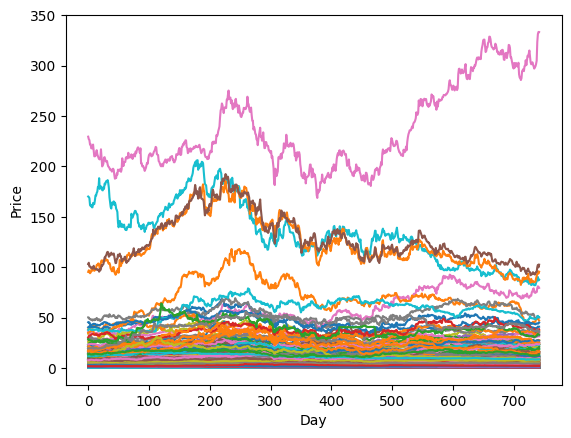

In [82]:
#Have a look at the prices during time

for row in df['Daily_price']:
    plt.plot(row)

plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [83]:
#Define the logarithm of return

def Returns(prices):
    prices = np.array(prices)
    log_returns = np.log(prices[1:] / prices[:-1])
    return log_returns.tolist()

In [84]:
#Create a column Log_return that contains the list of returns for each stock

df['Log_return'] = df['Daily_price'].apply(Returns)

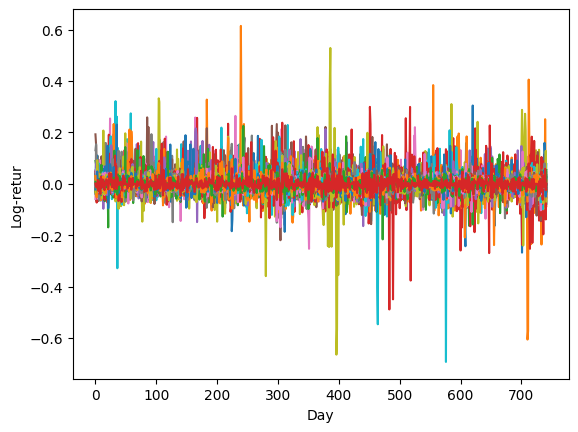

In [85]:
#Look at the log of the returns

for row in df['Log_return']:
    plt.plot(row)

plt.xlabel('Day')
plt.ylabel('Log-retur')
plt.show()

In [86]:
#We don't need more all these columns

df.drop(columns=[i for i in range(0,743)],inplace=True)

In [87]:
#Now the Dataframe looks...

df.head(10)

,Daily_price,Log_return
A2A,"[1.3045, 1.331, 1.3175, 1.34, 1.34, 1.3375, 1....","[0.020110713818328557, -0.010194537979594277, ..."
ABITARE IN,"[4.81, 4.83, 4.71, 4.86, 4.86, 4.83, 4.86, 4.9...","[0.004149383546811618, -0.025158559636154987, ..."
ACEA,"[17.15, 17.18, 17.01, 17.31, 17.07, 17.22, 17....","[0.0017477429441605384, -0.00994451014833884, ..."
AEFFE,"[1.104, 1.086, 1.07, 1.118, 1.152, 1.164, 1.12...","[-0.016438726343159835, -0.014842573037928852,..."
AEROP GUGL MARCO,"[8.48, 8.36, 8.52, 8.52, 8.46, 8.34, 8.5, 8.5,...","[-0.014252022707201615, 0.018957913744614207, ..."
ALERION CLEAN POWER,"[10.6, 12.85, 15.0, 14.9, 14.95, 14.65, 13.7, ...","[0.19248981022320735, 0.15470638976098133, -0...."
ALGOWATT,"[0.342, 0.341, 0.34, 0.344, 0.338, 0.343, 0.34...","[-0.002928259779088334, -0.0029368596733097135..."
ALKEMY,"[7.08, 7.04, 6.92, 6.9, 6.84, 7.1, 7.0, 7.0, 6...","[-0.00566573753567742, -0.017192400540372875, ..."
AMPLIFON,"[34.04, 33.94, 33.56, 33.02, 32.68, 33.84, 33....","[-0.0029420438990931815, -0.011259378207074639..."
ANIMA HOLDING,"[3.882, 3.926, 3.904, 4.034, 4.08, 4.114, 4.16...","[0.011270611107450791, -0.0056194273034232975,..."


In [88]:
#Let's inspect the distribution of log returns

log_return_flattened = []

for i in range(df.shape[0]):
    element = df.iloc[i,1]
    log_return_flattened.append(element)
    
log_return_flattened = log_return_flattened[0]

<AxesSubplot: ylabel='Frequency'>

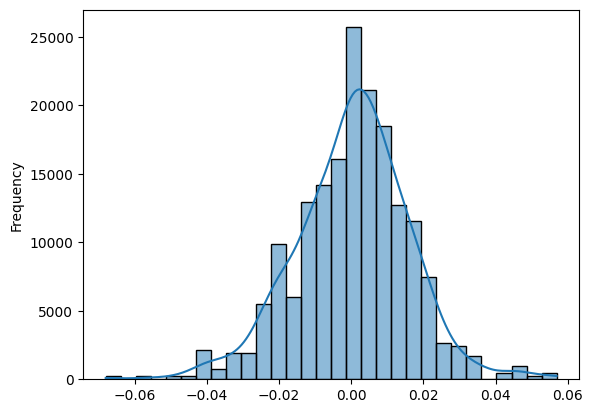

In [89]:
sns.histplot(log_return_flattened, kde=True, stat='frequency')

mu : 0.0004237716615723467, std : 0.01580530247533797
skewness: -0.1761677880747454
kurtosis: 1.116845204332905


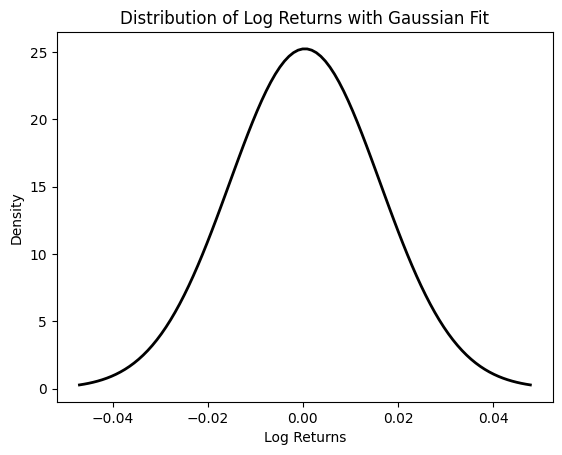

In [90]:
#Log returns follow a gaussian distribution

mu, std = norm.fit(log_return_flattened)
xmin, xmax = plt.xlim()
x = np.linspace(mu - 3 * std, mu + 3 * std, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Distribution of Log Returns with Gaussian Fit")
plt.xlabel("Log Returns")
plt.ylabel("Density")
print(f"mu : {mu}, std : {std}")

skewness = stats.skew(log_return_flattened)
kurtosis = stats.kurtosis(log_return_flattened)
print(f"skewness: {skewness}")
print(f"kurtosis: {kurtosis}")

In [91]:
#Define the Pearson correlation coefficient

from scipy.stats import pearsonr

def correlation_coefficient(series1, series2):
    correlation, p_value = pearsonr(series1, series2)
    return correlation

def correlation_in_windows(series1, series2, window_size):
    num_windows = len(series1) // window_size
    correlations = []

    for i in range(num_windows):
        start_idx = i * window_size
        end_idx = start_idx + window_size

        window1 = series1[start_idx:end_idx]
        window2 = series2[start_idx:end_idx]

        correlation = correlation_coefficient(window1,window2)
        correlations.append(correlation)

    return np.sum(correlations)/len(correlations)

In [92]:
from itertools import combinations
from tqdm import tqdm

#Generate all the combinations of couples of Log_return
couples = list(combinations(df['Log_return'], 2))

#Create a column Correlation_coefficients which is a list of dictionaries
df['Correlation_coefficients'] = [{} for _ in range(len(df))]

# Compute the correlation coefficient for each couple and store the value in the dictionary
for (idx1, list1), (idx2, list2) in tqdm(combinations(df['Log_return'].items(), 2)):
    coeff = correlation_coefficient(list1, list2)
    # coeff = correlation_in_windows(list1, list2, 63)
    df.loc[idx1, 'Correlation_coefficients'][str(idx2)] = coeff
    df.loc[idx2, 'Correlation_coefficients'][str(idx1)] = coeff

16836it [00:04, 3741.09it/s]


In [93]:
#Each row of Correlation_coefficients looks...

print(df.iloc[0]['Correlation_coefficients'])

{'ABITARE IN': 0.17931521989991742, 'ACEA': 0.637114678478924, 'AEFFE': 0.3195558485617619, 'AEROP GUGL MARCO': 0.1809998625927421, 'ALERION CLEAN POWER': 0.2936832575895854, 'ALGOWATT': 0.15366841331256412, 'ALKEMY': 0.21744371808646784, 'AMPLIFON': 0.3414995215435041, 'ANIMA HOLDING': 0.44860973025030015, 'ANTARES VISION': 0.10633672010151156, 'AQUAFIL': 0.25659956488254504, 'ASCOPIAVE': 0.4690599378075542, 'AUTOSTRADE MERIDIONALI': 0.14113097918427947, 'AVIO': 0.14261601182926176, 'AZIMUT HOLDING': 0.5077062790211567, 'BANCA GENERALI': 0.4470974608813348, 'BANCA IFIS': 0.40776865188471695, 'BANCA MEDIOLANUM': 0.46886819947747777, 'BANCA MONTE DEI PASCHI': 0.1199614535047143, 'BANCA SISTEMA': 0.31538764192768864, 'BANCO BPM': 0.36038299314104966, 'BASICNET': 0.1631682914433816, 'BASTOGI': 0.047987937646495865, 'BANCA PPO.DI SONDRIO': 0.35627657904465865, 'BANCA PROFILO': 0.2472911726777342, 'BEEWIZE': 0.08306644037563729, 'BEGHELLI': 0.08922545496326716, 'BFF BANK': 0.268644294682015

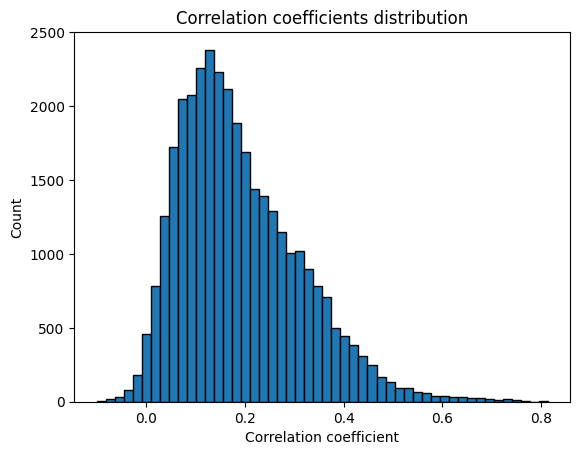

In [94]:
#Extract the correlation coefficients

coefficients = df['Correlation_coefficients'].apply(lambda x: list(x.values())).sum()

#Plot the distribution of correlation coefficients
plt.hist(coefficients, bins=50, edgecolor='black')
plt.xlabel('Correlation coefficient')
plt.ylabel('Count')
plt.title('Correlation coefficients distribution')
plt.show()


In [95]:
#Compute deciles of the correlation coefficient

l = []
for i in range(df.shape[0]):
    l.append(list(df.iloc[i]['Correlation_coefficients'].values()))
flat_l = [item for sublist in l for item in sublist]

sorted_coefficient = sorted(flat_l)
n = len(sorted_coefficient)

decili = [sorted_coefficient[int((n/10)*i)] for i in range(1, 10)]
print(decili)

[0.05267076721424906, 0.08404709767555309, 0.11301578662035984, 0.1386935183556269, 0.1670861216461497, 0.19877679692766703, 0.24072672091595856, 0.29165233999411266, 0.3591605359437259]


In [96]:
#Choose thresholds for the correlation coefficient for constructing graphs

LOW_THRESHOLD = decili[0]
MID_THRESHOLD = decili[1]
HIGH_THRESHOLD = decili[8]

In [97]:
#Function for building graphs

def build_graph(df, name):
      G = nx.Graph() 
      index = 0
      if name == "High correlation graph":
        for node in df.index:
          for connected_node, weight in df.iloc[index]['Correlation_coefficients'].items():
            if weight >= HIGH_THRESHOLD:
              G.add_node(node)
              G.add_edge(node, connected_node, weight=weight)
          index += 1
      elif name == "Low correlation graph":
        for node in df.index:
          for connected_node, weight in df.iloc[index]['Correlation_coefficients'].items():
            if weight >= LOW_THRESHOLD and weight <= MID_THRESHOLD:
              G.add_node(node)
              G.add_edge(node, connected_node, weight=weight)
          index += 1
      elif name == "Low-negative correlation graph":
        for node in df.index:
          for connected_node, weight in df.iloc[index]['Correlation_coefficients'].items():
            if weight <= LOW_THRESHOLD:
              G.add_node(node)
              G.add_edge(node, connected_node, weight=weight)
          index += 1
      else:
        print("Wrong graph's name")
        
      return G

In [98]:
#Our three graphs are...

HG = build_graph(df, "High correlation graph")
MG = build_graph(df, "Low correlation graph")
LG = build_graph(df, "Low-negative correlation graph")

In [99]:
'''
MST = nx.minimum_spanning_tree(G)
nx.draw(MST, with_labels=False, node_color='blue', node_size=10, font_size=8, width=0.1)
plt.show()
'''

"\nMST = nx.minimum_spanning_tree(G)\nnx.draw(MST, with_labels=False, node_color='blue', node_size=10, font_size=8, width=0.1)\nplt.show()\n"

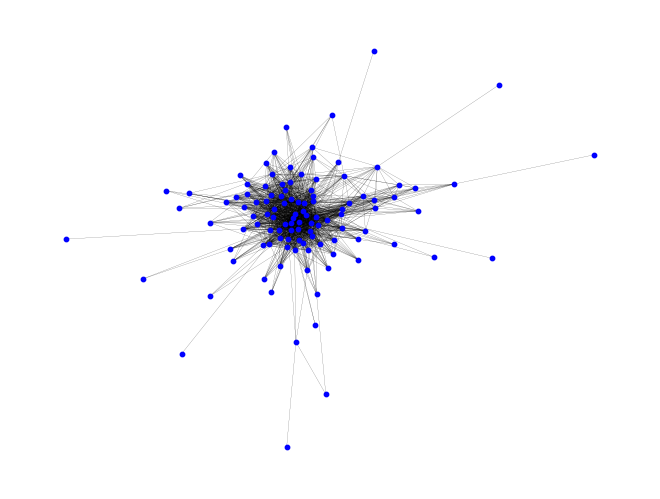

In [100]:
#Network visualization

nx.draw(HG, with_labels=False, node_color='blue', node_size=10, font_size=8, width=0.1)
plt.show()

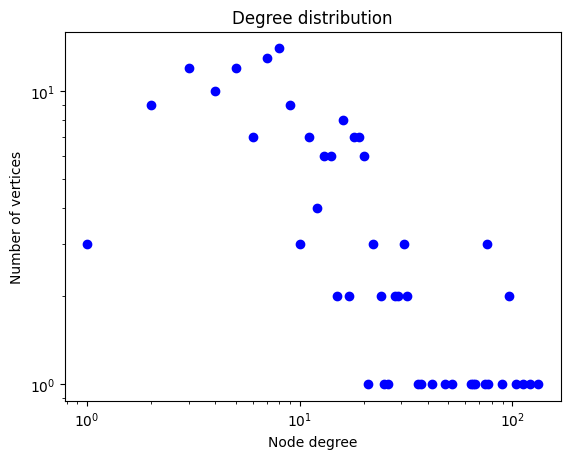

In [101]:
#Degree distribution

counts = nx.degree_histogram(LG)
degrees = [i for i in range(len(counts))]

plt.scatter(degrees, counts, color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Node degree')
plt.ylabel('Number of vertices')
plt.title('Degree distribution')
plt.show()


In [102]:
#The density of the graph

density = nx.density(LG)
print(density)

0.10002375861249703


In [103]:
#How many nodes with degree different from zero there are

nodes_with_nozero_degree = []

for node, deg in nx.degree(LG):
  if deg != 0:
    nodes_with_nozero_degree.append(node)

print(len(nodes_with_nozero_degree))

184


In [104]:
#CLIQUES
clique = nx.approximation.max_clique(HG)
print(len(clique))

26


In [105]:
nx.approximation.average_clustering(HG, trials=100000, seed=10)

0.7376